In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import sys

In [59]:
crime=pd.read_csv(r"C:\Users\Shubham\Downloads\crime_data_final.csv")
crime.head(5)

,State,Crime,Crime_Count,Year,Severity_Level
0,Maharashtra,Women Harassment,541,2020,High
1,Maharashtra,Women Harassment,1798,2021,Medium
2,Maharashtra,Women Harassment,7991,2022,Low
3,Maharashtra,Women Harassment,4986,2023,Medium
4,Maharashtra,Child Labour,3907,2020,High


In [60]:
ngo = pd.read_csv(r"C:\Users\Shubham\Downloads\ngo_data_final.csv")
ngo.head(5)

,NGO_Name,Focus_Area,NGO_Type,State,City,Registration_Number,Active_Projects,Year_Started,Contact_Email,Funding_Level,Volunteers,Awards,Rating
0,HopeCare Foundation,Human Trafficking,Domestic Abuse Support,Kerala,Chennai,60427,33,2000,support@yahoo.com,High,238,Best NGO Award,Good
1,StopTraffick Mission,Cyber Crime,Cyber Safety,Uttar Pradesh,Lucknow,94831,37,2008,support@yahoo.com,Medium,570,National Excellence Award,Excellent
2,Parivartan Society,Rape Cases,Cyber Safety,Kerala,Bengaluru,71255,40,2001,support@yahoo.com,Low,1851,Best NGO Award,Average
3,SecureFuture Org,Domestic Violence,Women Rights,Rajasthan,Jaipur,93554,52,2009,info@gmail.com,Low,131,National Excellence Award,Very Good
4,SaveWomen Foundation,Domestic Violence,Legal Aid,Rajasthan,Ahmedabad,67603,36,2017,info@gmail.com,Low,1304,Best NGO Award,Good


In [61]:
crime.columns

Index(['State', 'Crime', 'Crime_Count', 'Year', 'Severity_Level'], dtype='object')

In [62]:
ngo.columns

Index(['NGO_Name', 'Focus_Area', 'NGO_Type', 'State', 'City',
       'Registration_Number', 'Active_Projects', 'Year_Started',
       'Contact_Email', 'Funding_Level', 'Volunteers', 'Awards', 'Rating'],
      dtype='object')

In [63]:
crime.isna().sum()

State             0
Crime             0
Crime_Count       0
Year              0
Severity_Level    0
dtype: int64

In [64]:
ngo.isna().sum()

NGO_Name                0
Focus_Area              0
NGO_Type                0
State                   0
City                    0
Registration_Number     0
Active_Projects         0
Year_Started            0
Contact_Email           0
Funding_Level           0
Volunteers              0
Awards                 22
Rating                  0
dtype: int64

In [65]:
ngo['Awards'] =ngo['Awards'].fillna('none')

In [66]:
merged = pd.merge(crime,ngo, left_on=['State', 'Crime'], right_on = ['State','Focus_Area'] , how ='inner')

In [67]:
merged.head(5)

,State,Crime,Crime_Count,Year,Severity_Level,NGO_Name,Focus_Area,NGO_Type,City,Registration_Number,Active_Projects,Year_Started,Contact_Email,Funding_Level,Volunteers,Awards,Rating
0,Maharashtra,Women Harassment,541,2020,High,RescueKids NGO,Women Harassment,Legal Aid,Chennai,76153,5,2008,contact@ngo.org,Low,334,Best NGO Award,Average
1,Maharashtra,Women Harassment,541,2020,High,WomenRise India,Women Harassment,Domestic Abuse Support,Delhi,50823,2,2022,support@yahoo.com,Low,551,Humanity Service Award,Average
2,Maharashtra,Women Harassment,541,2020,High,SaveWomen Foundation,Women Harassment,Child Protection,Bengaluru,10739,25,1994,info@gmail.com,High,1751,Humanity Service Award,Excellent
3,Maharashtra,Women Harassment,1798,2021,Medium,RescueKids NGO,Women Harassment,Legal Aid,Chennai,76153,5,2008,contact@ngo.org,Low,334,Best NGO Award,Average
4,Maharashtra,Women Harassment,1798,2021,Medium,WomenRise India,Women Harassment,Domestic Abuse Support,Delhi,50823,2,2022,support@yahoo.com,Low,551,Humanity Service Award,Average


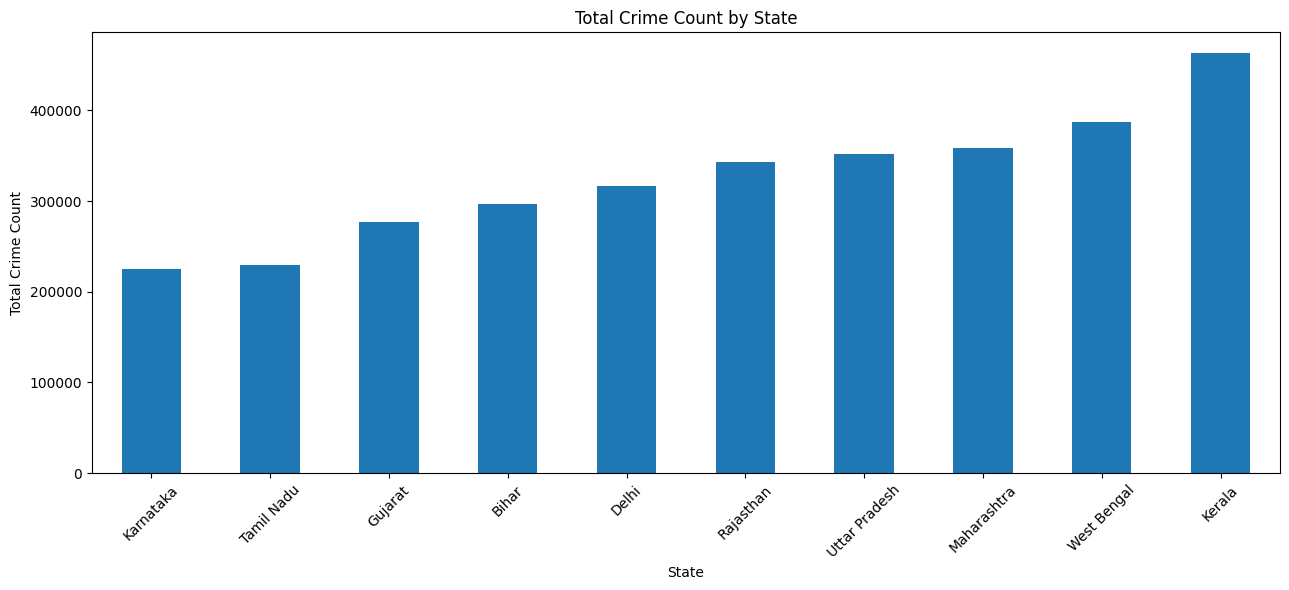

In [68]:
#1 Which state has the highest crime count overall?
plt.figure(figsize = (13,6))
merged.groupby("State")["Crime_Count"].sum().sort_values(ascending=True).plot(kind ='bar')
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Total Crime Count")
plt.title("Total Crime Count by State")
plt.tight_layout()
plt.show()

In [69]:
#2 Which crime type is most common across India?
df = merged.groupby('Crime')['Crime_Count'].sum().sort_values(ascending=False).reset_index()

In [70]:
df

,Crime,Crime_Count
0,Domestic Violence,606243
1,Women Harassment,484329
2,Child Abuse,483506
3,Cyber Crime,480389
4,Rape Cases,443474
5,Child Labour,402855
6,Human Trafficking,347994


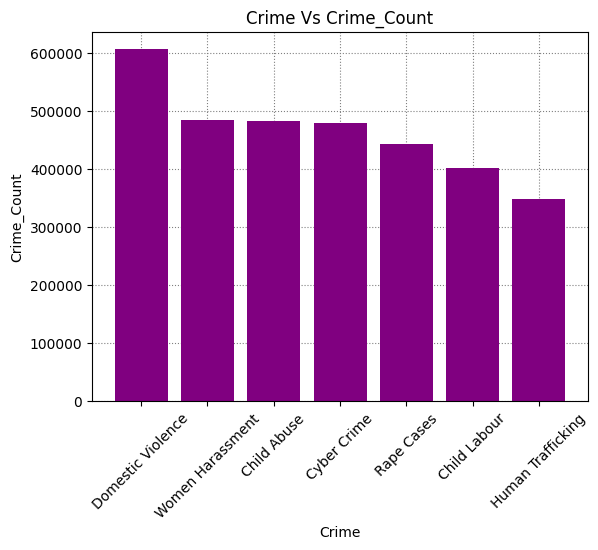

In [71]:
plt.bar(df.Crime,df.Crime_Count,color = 'purple')
plt.title("Crime Vs Crime_Count")
plt.xlabel("Crime")
plt.ylabel("Crime_Count")
plt.xticks(rotation =45)
plt.grid(linestyle =":" , color= 'gray')
plt.gca().set_axisbelow(True)
plt.show()

In [72]:
line = merged.groupby('Year')['Crime_Count'].sum().reset_index()
line

,Year,Crime_Count
0,2020,846035
1,2021,778481
2,2022,846279
3,2023,777995


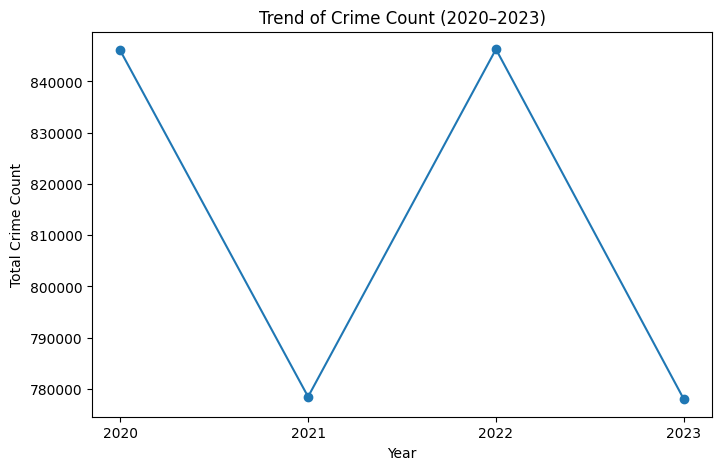

In [73]:
#3 What is the trend of crime count from 2020–2023?

plt.figure(figsize=(8,5))
plt.plot(line.Year, line.Crime_Count, marker='o')
plt.title("Trend of Crime Count (2020–2023)")
plt.xticks(range(2020,2024))
plt.xlabel("Year")          
plt.ylabel("Total Crime Count")
plt.show()

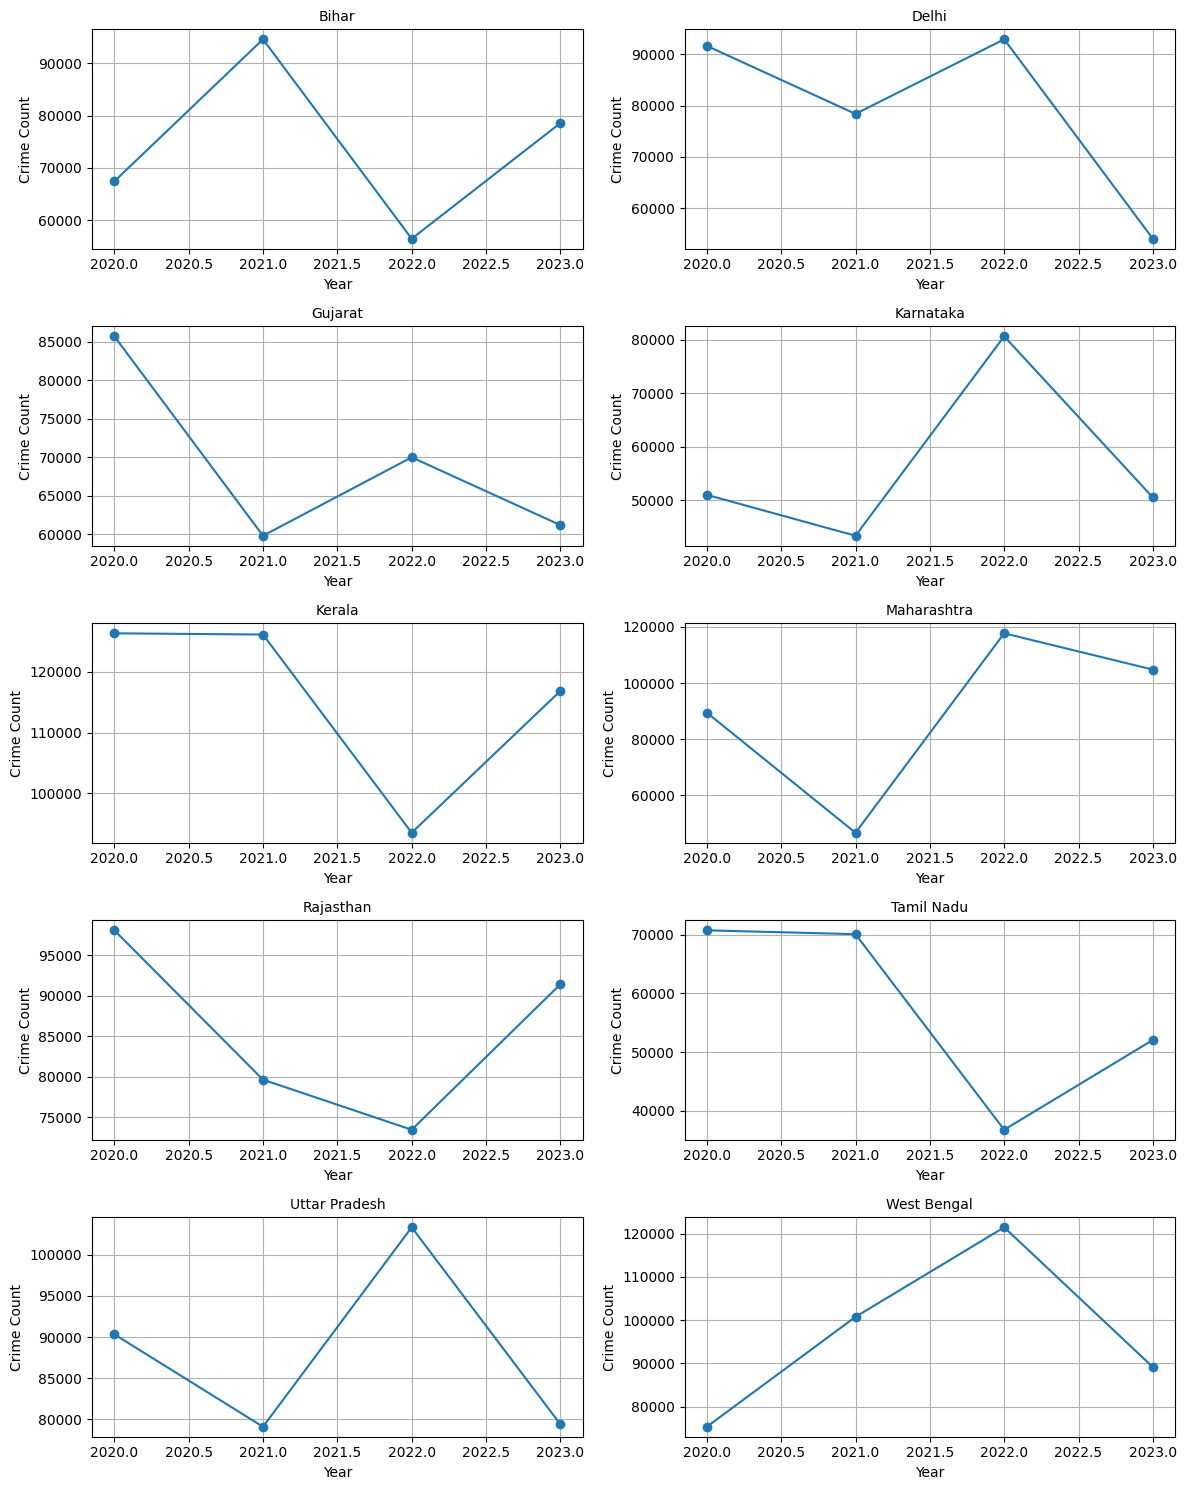

In [74]:
#4 Which states show decreasing crime trends?
trends = merged.groupby(['State','Year'])['Crime_Count'].sum().reset_index()
trends
states = trends['State'].unique()
plt.figure(figsize=(12,15))
for idx,state in enumerate(states,1):
    plt.subplot(5,2,idx)
    state_date = trends[trends['State'] == state].sort_values('Year')

    plt.plot(state_date['Year'],state_date['Crime_Count'],marker ='o')
    plt.xlabel("Year")
    plt.ylabel("Crime Count")
    plt.title(state,fontsize = 10)
    plt.grid(True)

plt.tight_layout()
plt.show()

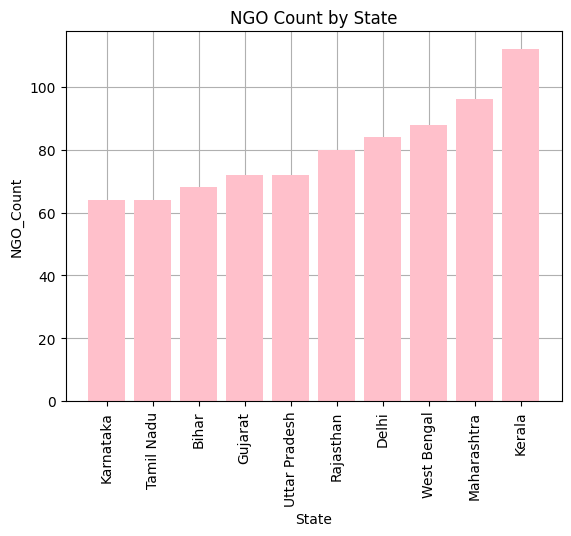

In [75]:
#5 Which state has the highest number of NGOs? 
ngo2= merged.groupby('State')['NGO_Name'].count().sort_values(ascending=True)
plt.bar(ngo2.index,ngo2.values, color = 'Pink')
plt.title("NGO Count by State")
plt.xlabel("State")
plt.ylabel("NGO_Count")
plt.xticks(rotation=90)
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

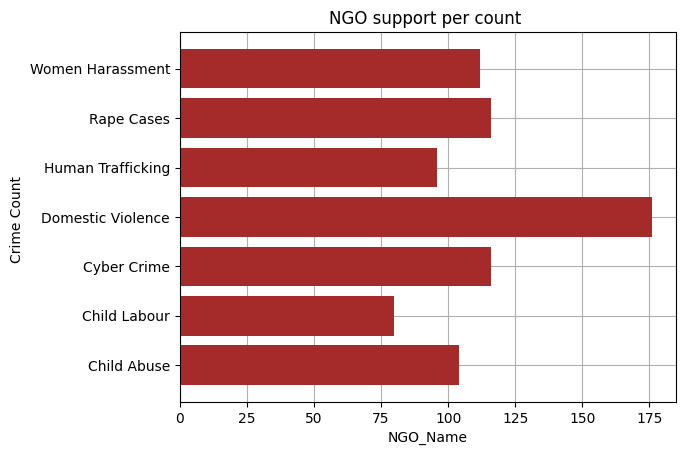

In [76]:
#6 Which crime type has maximum NGO support?
ngo_Support=merged.groupby('Crime')['NGO_Name'].count()
plt.barh(ngo_Support.index,ngo_Support.values,color= 'brown')
plt.title("NGO support per count ")
plt.xlabel("NGO_Name")
plt.ylabel("Crime Count ")
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()


In [77]:
#7 What is the average number of volunteers per NGO?
Avg_vol = merged.groupby('NGO_Name')['Volunteers'].mean().astype(int)
Avg_vol


NGO_Name
ChildHelp India         1027
ChildProtect Mission     810
CyberSafe Org           1005
HopeCare Foundation     1076
JusticeForAll NGO       1167
Parivartan Society       962
RescueKids NGO          1052
SaveWomen Foundation    1088
SecureFuture Org         955
StopTraffick Mission     937
Udaan Trust              828
WomenRise India          826
Name: Volunteers, dtype: int64

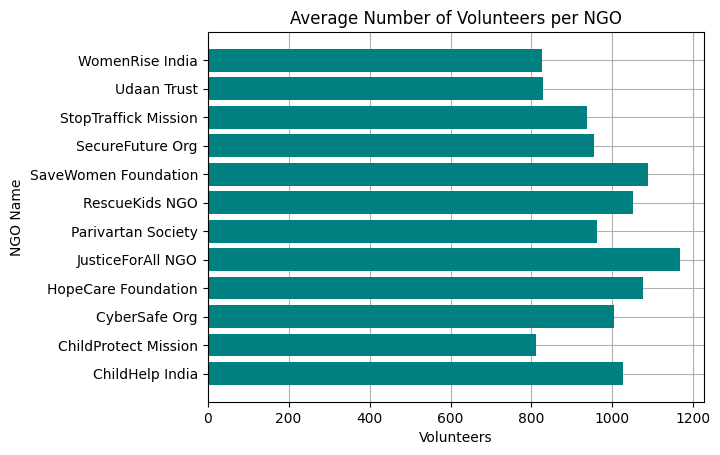

In [78]:
Avg_vol = merged.groupby('NGO_Name')['Volunteers'].mean().astype(int)
plt.barh(Avg_vol.index,Avg_vol.values,color= 'teal')
plt.title("Average Number of Volunteers per NGO")
plt.xlabel("Volunteers")
plt.ylabel("NGO Name")
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()


In [79]:

# 8 Which NGO category (NGO_Type) is most common?
ngo3 = merged.groupby('NGO_Type')['NGO_Type'].count().sort_values(ascending=False)
ngo3


NGO_Type
Legal Aid                 148
Cyber Safety              140
Domestic Abuse Support    112
Women Rights              112
Child Protection          108
Counselling               100
Anti-Trafficking           80
Name: NGO_Type, dtype: int64

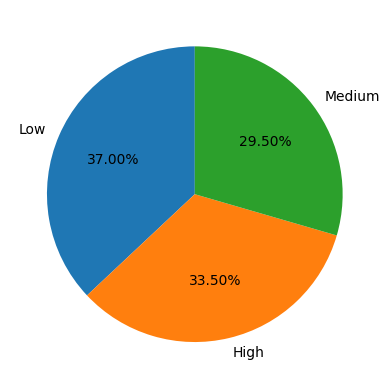

In [80]:
#9 What funding level (Low/Medium/High) is most frequent?
funding = merged.groupby('Funding_Level')['Funding_Level'].count().sort_values(ascending=False)
plt.pie(funding.values,labels=funding.index,startangle=90,autopct= "%1.2f%%")
plt.show()

In [81]:
#10 Which state has the best NGO-to-crime ratio?

ngo1 = merged.groupby('State')['NGO_Name'].count()
crime= merged.groupby('State')['Crime_Count'].sum()
ratio = ngo/crime
ratio.idxmax()

C:\Users\Shubham\AppData\Local\Temp\ipykernel_1816\4150822119.py:6: FutureWarning:

The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError



Active_Projects       NaN
Awards                NaN
Bihar                 NaN
City                  NaN
Contact_Email         NaN
Delhi                 NaN
Focus_Area            NaN
Funding_Level         NaN
Gujarat               NaN
Karnataka             NaN
Kerala                NaN
Maharashtra           NaN
NGO_Name              NaN
NGO_Type              NaN
Rajasthan             NaN
Rating                NaN
Registration_Number   NaN
State                 NaN
Tamil Nadu            NaN
Uttar Pradesh         NaN
Volunteers            NaN
West Bengal           NaN
Year_Started          NaN
dtype: float64

In [82]:
#11 Which crimes have high crime count but low NGO support? 
crime_count = merged.groupby('Crime')["Crime_Count"].sum()
ngo_support= merged.groupby('Crime')["NGO_Name"].count()
crime_count
ngo_support

Crime
Child Abuse          104
Child Labour          80
Cyber Crime          116
Domestic Violence    176
Human Trafficking     96
Rape Cases           116
Women Harassment     112
Name: NGO_Name, dtype: int64

In [83]:
df = pd.DataFrame({"Crime_count" : crime_count.values,
                   "ngo_support" :  ngo_support}).reset_index()
df

,Crime,Crime_count,ngo_support
0,Child Abuse,483506,104
1,Child Labour,402855,80
2,Cyber Crime,480389,116
3,Domestic Violence,606243,176
4,Human Trafficking,347994,96
5,Rape Cases,443474,116
6,Women Harassment,484329,112


In [84]:
high_low = df[
    (df["Crime_count"]> df["Crime_count"].mean()) &
    (df["ngo_support"]< df["ngo_support"].mean())
]
high_low

,Crime,Crime_count,ngo_support
0,Child Abuse,483506,104
6,Women Harassment,484329,112


In [85]:
#12 Which states have NGOs but low crime numbers?
state_crime = merged.groupby('State')['Crime_Count'].sum()
state_ngo=merged.groupby('State')["NGO_Name"].count()
state_ngo

State
Bihar             68
Delhi             84
Gujarat           72
Karnataka         64
Kerala           112
Maharashtra       96
Rajasthan         80
Tamil Nadu        64
Uttar Pradesh     72
West Bengal       88
Name: NGO_Name, dtype: int64

In [86]:
df1 = pd.DataFrame({"state_crime" : state_crime.values,
                   "state_ngo" :  state_ngo}).reset_index()
df1

,State,state_crime,state_ngo
0,Bihar,297017,68
1,Delhi,316951,84
2,Gujarat,276669,72
3,Karnataka,225522,64
4,Kerala,462902,112
5,Maharashtra,358664,96
6,Rajasthan,342566,80
7,Tamil Nadu,229678,64
8,Uttar Pradesh,352167,72
9,West Bengal,386654,88


In [87]:
low_crime_ngo = df1[
    (df1["state_ngo"]> 0) &
    (df1["state_crime"] < df1["state_crime"].mean())
]
low_crime_ngo

,State,state_crime,state_ngo
0,Bihar,297017,68
1,Delhi,316951,84
2,Gujarat,276669,72
3,Karnataka,225522,64
7,Tamil Nadu,229678,64


In [88]:
ngo.columns

Index(['NGO_Name', 'Focus_Area', 'NGO_Type', 'State', 'City',
       'Registration_Number', 'Active_Projects', 'Year_Started',
       'Contact_Email', 'Funding_Level', 'Volunteers', 'Awards', 'Rating'],
      dtype='object')

City
Kolkata       56
Kochi         60
Bengaluru     76
Patna         76
Lucknow       80
Chennai       80
Delhi         84
Ahmedabad     84
Jaipur        96
Mumbai       108
Name: NGO_Name, dtype: int64

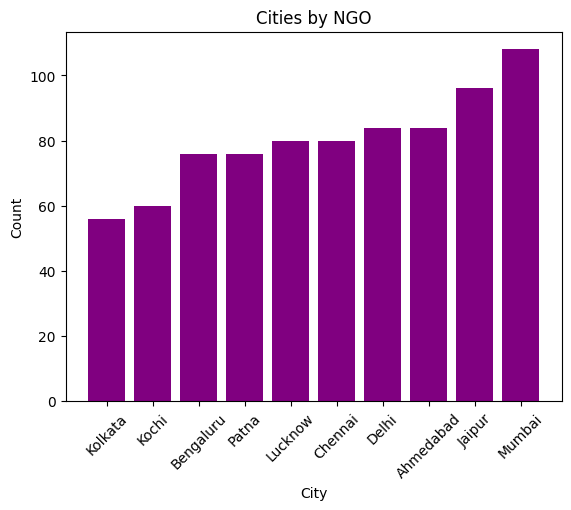

In [89]:
#13 Which cities have the most NGOs?

Most_Ngo= merged.groupby('City')['NGO_Name'].count().sort_values()
plt.bar(Most_Ngo.index,Most_Ngo.values,color='purple')
plt.title("Cities by NGO")
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
Most_Ngo


In [90]:
#14 How many NGOs started after 2010?
df2 = pd.DataFrame({"NGO" : merged.NGO_Name, "Started_Year": merged.Year_Started})
df2

,NGO,Started_Year
0,RescueKids NGO,2008
1,WomenRise India,2022
2,SaveWomen Foundation,1994
3,RescueKids NGO,2008
4,WomenRise India,2022
...,...,...
795,CyberSafe Org,2009
796,RescueKids NGO,2002
797,Parivartan Society,2001
798,CyberSafe Org,2009


In [91]:
Ngo_start = df2[(df2['Started_Year']>2010)]
tot_ngo = len(Ngo_start)
tot_ngo

280

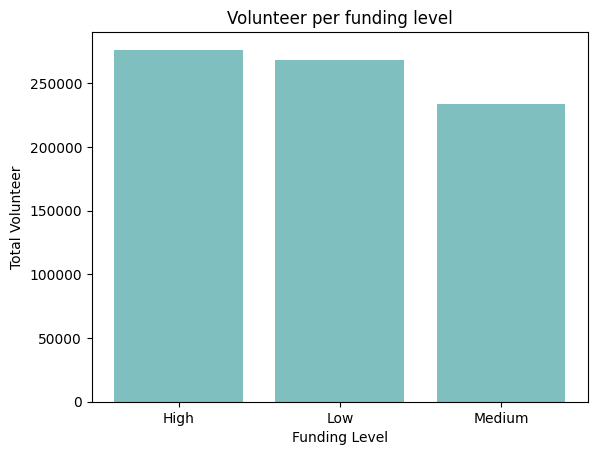

In [92]:
#15 Which funding level has the highest volunteer strength?
Vol_strength = merged.groupby("Funding_Level")['Volunteers'].sum()
plt.bar(Vol_strength.index,Vol_strength.values ,color = 'teal',alpha =0.5)
plt.title("Volunteer per funding level")
plt.xlabel("Funding Level")
plt.ylabel("Total Volunteer")
plt.show()

In [93]:
#16 Which award is most commonly won by NGOs?
merged.groupby('Awards')['Awards'].count().idxmax()


'Humanity Service Award'

In [94]:
#17 What ratings do award-winning NGOs have?
winning =merged[merged["Awards"] != 'none']
winning =winning.groupby(['NGO_Name','Awards'])["Rating"].unique().apply(list).reset_index()
winning 


,NGO_Name,Awards,Rating
0,ChildHelp India,Best NGO Award,[Average]
1,ChildHelp India,Humanity Service Award,"[Good, Excellent]"
2,ChildHelp India,National Excellence Award,"[Excellent, Very Good]"
3,ChildHelp India,Women Empowerment Award,"[Excellent, Very Good, Good]"
4,ChildProtect Mission,Best NGO Award,"[Very Good, Average]"
...,...,...,...
60,WomenRise India,Child Safety Award,"[Good, Excellent, Very Good, Average]"
61,WomenRise India,Community Impact Award,"[Very Good, Good, Excellent]"
62,WomenRise India,Humanity Service Award,"[Average, Very Good, Good]"
63,WomenRise India,National Excellence Award,[Good]


In [95]:
#18 Which NGO has the highest number of active projects?
merged.groupby('NGO_Name')['Active_Projects'].sum().sort_values(ascending= False).head(1)


NGO_Name
Parivartan Society    3356
Name: Active_Projects, dtype: int64

In [96]:
merged.NGO_Name.unique()

array(['RescueKids NGO', 'WomenRise India', 'SaveWomen Foundation',
       'ChildHelp India', 'SecureFuture Org', 'StopTraffick Mission',
       'JusticeForAll NGO', 'HopeCare Foundation', 'Parivartan Society',
       'ChildProtect Mission', 'Udaan Trust', 'CyberSafe Org'],
      dtype=object)

Text(0, 0.5, 'Count')

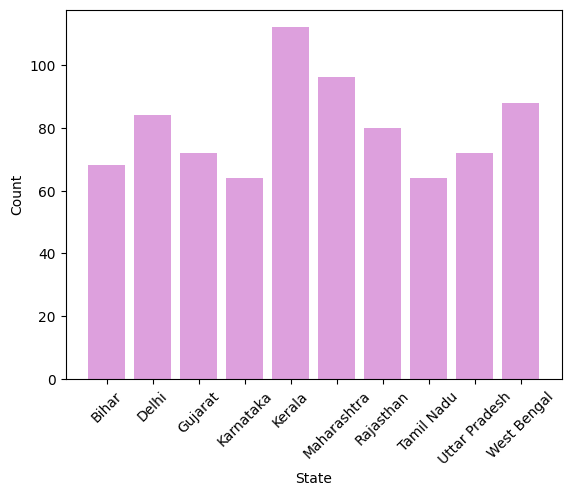

In [97]:
#19 Plot NGOs per State (Bar Plot).
ngo_per_state=merged.groupby('State')['NGO_Name'].count()
plt.bar(ngo_per_state.index,ngo_per_state.values,color='plum')
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Count")


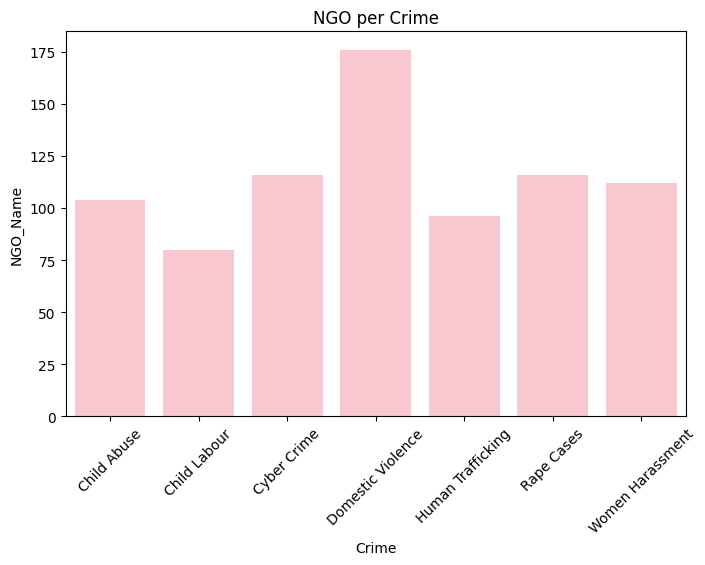

In [98]:

#20 Plot NGOs per Crime Type (Bar Plot).
count_ngo = merged.groupby("Crime")["NGO_Name"].count().reset_index()
count_ngo
plt.figure(figsize=(8,5))
sns.barplot(data = count_ngo , x='Crime' ,y ='NGO_Name', color = 'pink')
plt.xticks(rotation = 45)
plt.title("NGO per Crime")
plt.show()


<Axes: xlabel='Severity_Level', ylabel='Crime'>

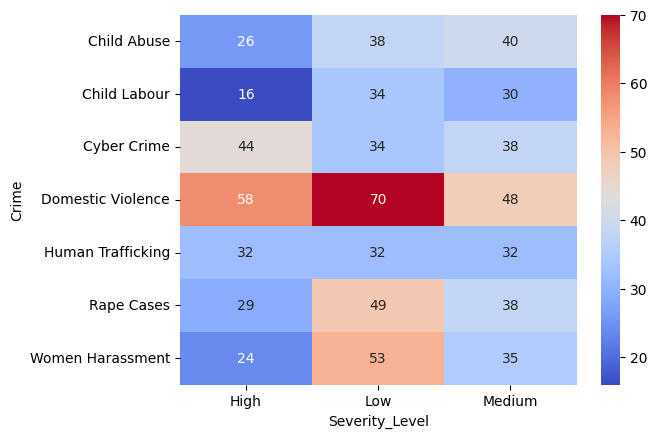

In [99]:
#21 Create a heatmap: Crime Severity vs NGO Support.
heatmap= merged.groupby(["Crime","Severity_Level"])["NGO_Name"].count().unstack()
heatmap

sns.heatmap(heatmap,annot = True, cmap='coolwarm')

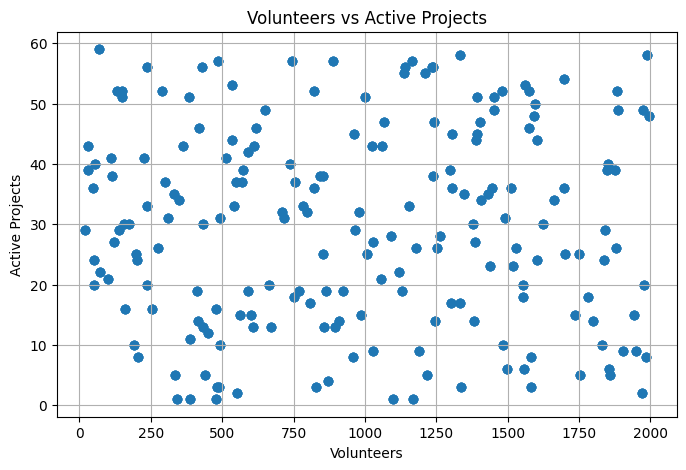

In [100]:
#22 Scatter plot: Volunteers vs Active_Projects.
plt.figure(figsize=(8,5))
plt.scatter(merged['Volunteers'], merged['Active_Projects'])

plt.xlabel("Volunteers")
plt.ylabel("Active Projects")
plt.title("Volunteers vs Active Projects")
plt.grid(True)
plt.show()


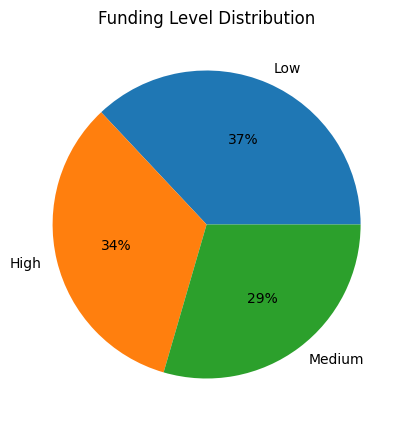

In [101]:
#23 Pie chart: Funding Level Distribution.

Funding = merged['Funding_Level'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(Funding, labels=Funding.index, autopct='%.0f%%')
plt.title("Funding Level Distribution")
plt.show()


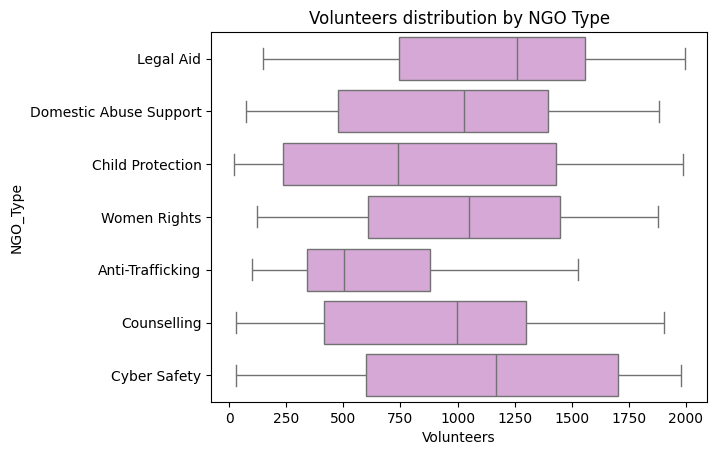

In [102]:

#24 Boxplot: Volunteers distribution by NGO Type.
sns.boxplot(data = merged, x ="Volunteers" , y = "NGO_Type",color='plum')
plt.title("Volunteers distribution by NGO Type")
plt.show()


In [103]:
merged

,State,Crime,Crime_Count,Year,Severity_Level,NGO_Name,Focus_Area,NGO_Type,City,Registration_Number,Active_Projects,Year_Started,Contact_Email,Funding_Level,Volunteers,Awards,Rating
0,Maharashtra,Women Harassment,541,2020,High,RescueKids NGO,Women Harassment,Legal Aid,Chennai,76153,5,2008,contact@ngo.org,Low,334,Best NGO Award,Average
1,Maharashtra,Women Harassment,541,2020,High,WomenRise India,Women Harassment,Domestic Abuse Support,Delhi,50823,2,2022,support@yahoo.com,Low,551,Humanity Service Award,Average
2,Maharashtra,Women Harassment,541,2020,High,SaveWomen Foundation,Women Harassment,Child Protection,Bengaluru,10739,25,1994,info@gmail.com,High,1751,Humanity Service Award,Excellent
3,Maharashtra,Women Harassment,1798,2021,Medium,RescueKids NGO,Women Harassment,Legal Aid,Chennai,76153,5,2008,contact@ngo.org,Low,334,Best NGO Award,Average
4,Maharashtra,Women Harassment,1798,2021,Medium,WomenRise India,Women Harassment,Domestic Abuse Support,Delhi,50823,2,2022,support@yahoo.com,Low,551,Humanity Service Award,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Kerala,Rape Cases,5416,2022,Medium,CyberSafe Org,Rape Cases,Legal Aid,Chennai,33969,45,2009,info@gmail.com,Medium,1393,Humanity Service Award,Average
796,Kerala,Rape Cases,5416,2022,Medium,RescueKids NGO,Rape Cases,Legal Aid,Patna,53360,6,2002,support@yahoo.com,Low,1556,Best NGO Award,Very Good
797,Kerala,Rape Cases,2658,2023,High,Parivartan Society,Rape Cases,Cyber Safety,Bengaluru,71255,40,2001,support@yahoo.com,Low,1851,Best NGO Award,Average
798,Kerala,Rape Cases,2658,2023,High,CyberSafe Org,Rape Cases,Legal Aid,Chennai,33969,45,2009,info@gmail.com,Medium,1393,Humanity Service Award,Average


In [104]:
#25 Funnel Chart: Top 10 NGOs by Volunteers.

import plotly.express as px 
top10 = merged.groupby("NGO_Name")['Volunteers'].sum().nlargest(10).reset_index()
fig = px.funnel(top10 , y="NGO_Name" , x ="Volunteers" , 
                title="Funnel Chart : Top 10 NGOs by Volunteers")
fig.show()


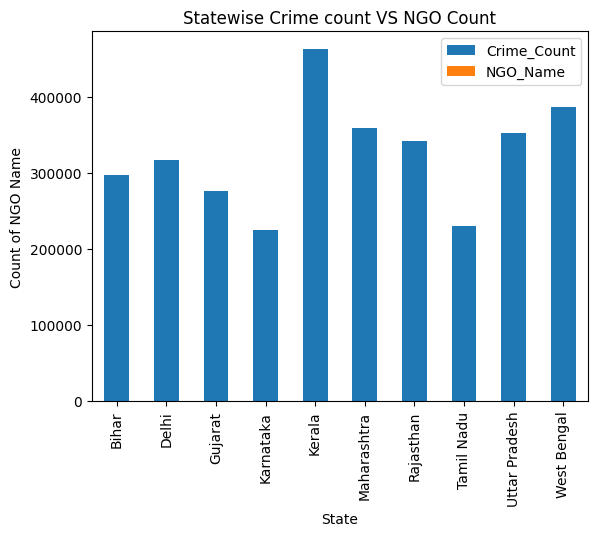

In [105]:
#26 Stacked bar chart: Crime Count vs NGO Count per State.
cri = merged.groupby("State").agg({
    'Crime_Count':'sum',
    'NGO_Name': 'count'
}).reset_index()
cri.plot(x="State",kind='bar',stacked='True')
plt.title("Statewise Crime count VS NGO Count")
plt.ylabel("Count of NGO Name")
plt.show()


In [106]:
#27 Is NGO support proportional to crime severity?
cri_count= merged.groupby('Severity_Level')['Crime_Count'].sum()
ngo_count= merged.groupby('Severity_Level')['NGO_Name'].count()


In [107]:
cri_count

Severity_Level
High       886138
Low       1275927
Medium    1086725
Name: Crime_Count, dtype: int64

In [108]:
ngo_count

Severity_Level
High      229
Low       310
Medium    261
Name: NGO_Name, dtype: int64

Based on the data analysis, NGO support does not increase with crime severity.
Surprisingly, states with lower crime severity actually have more NGOs.
This shows that NGO presence is influenced by factors such as population, awareness, accessibility, and funding—not only crime levels

In [109]:
#28 Does funding level affect number of active projects?
merged.groupby('Funding_Level')['Active_Projects'].sum().reset_index()


,Funding_Level,Active_Projects
0,High,8296
1,Low,8136
2,Medium,7148


The analysis shows that funding level has a moderate impact on the number of active projects.
High funding levels support the largest number of projects, while medium funding levels have the least.
However, the difference between high and low funding categories is small, indicating that funding level affects project activity, but not very strongly.

In [110]:
#29 Top 5 states needing urgent NGO support.
state_need = merged.groupby('State').agg({
    'Crime_Count' : 'sum',
    'NGO_Name':'count'
}).reset_index()
state_need.rename(columns={'NGO_Name' :'NGO_Count'},inplace= True)
state_need


,State,Crime_Count,NGO_Count
0,Bihar,297017,68
1,Delhi,316951,84
2,Gujarat,276669,72
3,Karnataka,225522,64
4,Kerala,462902,112
5,Maharashtra,358664,96
6,Rajasthan,342566,80
7,Tamil Nadu,229678,64
8,Uttar Pradesh,352167,72
9,West Bengal,386654,88


In [111]:
state_need['Need_Score'] = state_need['Crime_Count']/ state_need['NGO_Count']
state_need

,State,Crime_Count,NGO_Count,Need_Score
0,Bihar,297017,68,4367.897059
1,Delhi,316951,84,3773.226190
2,Gujarat,276669,72,3842.625000
3,Karnataka,225522,64,3523.781250
4,Kerala,462902,112,4133.053571
5,Maharashtra,358664,96,3736.083333
6,Rajasthan,342566,80,4282.075000
7,Tamil Nadu,229678,64,3588.718750
8,Uttar Pradesh,352167,72,4891.208333
9,West Bengal,386654,88,4393.795455


In [112]:
top_5= state_need.sort_values(by = 'Need_Score',ascending= False).head(5)

In [113]:
top_5

,State,Crime_Count,NGO_Count,Need_Score
8,Uttar Pradesh,352167,72,4891.208333
9,West Bengal,386654,88,4393.795455
0,Bihar,297017,68,4367.897059
6,Rajasthan,342566,80,4282.075000
4,Kerala,462902,112,4133.053571


In [114]:
#Q 30) Top 5 crimes with insufficient NGO activity.
crime_need = merged.groupby('Crime').agg({'Crime_Count': 'sum','NGO_Name':'count'}).reset_index()
crime_need['Need_Score'] = crime_need['Crime_Count'] / crime_need['NGO_Name']

top5_crimes_need = crime_need.sort_values(by='Need_Score', ascending=False).head(5)
top5_crimes_need

,Crime,Crime_Count,NGO_Name,Need_Score
1,Child Labour,402855,80,5035.687500
0,Child Abuse,483506,104,4649.096154
6,Women Harassment,484329,112,4324.366071
2,Cyber Crime,480389,116,4141.284483
5,Rape Cases,443474,116,3823.051724


The Need Score analysis indicates that Child Labour, Child Abuse, Women Harassment, Cyber Crime, and Rape Cases urgently require increased NGO involvement.
These crime categories show the largest imbalance between crime volume and NGO activity, highlighting a critical need for more volunteers, resources, and specialized interventions.